Column names in the DataFrame: Index([    'Points',        'LAI',      'LAI.1', 'Flavonoids',    'phenols',
                400,          401,          402,          403,          404,
       ...
               2491,         2492,         2493,         2494,         2495,
               2496,         2497,         2498,         2499,         2500],
      dtype='object', length=2106)


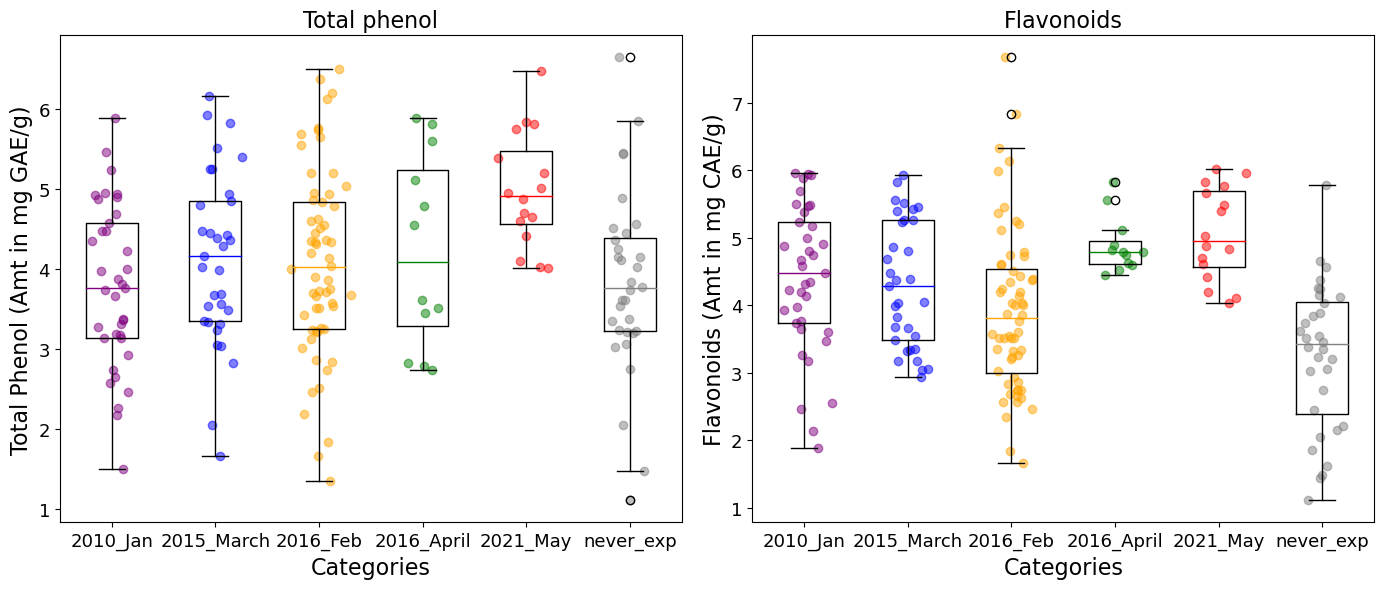

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load the data
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
df = pd.read_excel(dataframe)

# Print the column names for debugging
print("Column names in the DataFrame:", df.columns)

# Prepare the feature and target variables
X = df.iloc[:, 3:]  # Adjust this if necessary
flavonoids = df.columns[1]  # Adjust if this is not the correct column
phenolics = df.columns[2]  # Adjust if this is not the correct column

# Determine the number of rows for each category
num_rows = len(df)

# Create a mapping of the indices to categories based on actual counts
categories = []
categories += ['2010_Jan'] * (158 - 121)  # Updated year
categories += ['2015_March'] * 33          # Updated year
categories += ['2016_Feb'] * (93 - 33)
categories += ['2016_April'] * (105 - 93)
categories += ['2021_May'] * (121 - 105)   # Updated year
categories += ['never_exp'] * (num_rows - sum([158 - 121, 33, 93 - 33, 105 - 93, 121 - 105]))

# Ensure the categories list matches the DataFrame length
if len(categories) != num_rows:
    raise ValueError(f"Length of categories ({len(categories)}) does not match DataFrame length ({num_rows})")

# Add categories to the DataFrame
df['Category'] = categories

# Define colors for each category
color_map = {
    '2010_Jan': 'purple',
    '2015_March': 'blue',
    '2016_Feb': 'orange',
    '2016_April': 'green',
    '2021_May': 'red',  # Updated year
    'never_exp': 'gray'
}

# Define the order of categories
category_order = ['2010_Jan', '2015_March', '2016_Feb', '2016_April', '2021_May', 'never_exp']

# Function to create box plots
def create_box_plots(phen_data, flav_data):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Phenolics box plot
    box_phen = axs[0].boxplot([phen_data[cat] for cat in category_order], labels=category_order)
    for i, cat in enumerate(category_order):
        values = phen_data[cat]
        axs[0].scatter(np.random.normal(i + 1, 0.1, len(values)), values,
                       alpha=0.5, color=color_map[cat])

        # Set color of median line to match scatter points
        box_phen['medians'][i].set_color(color_map[cat])  # Median line color

    axs[0].set_title('Total phenol', fontsize=16)
    axs[0].set_xlabel('Categories', fontsize=16)
    axs[0].set_ylabel('Total Phenol (Amt in mg GAE/g)', fontsize=16)
    axs[0].tick_params(axis='y', labelsize=13)  # Increase Y-axis font size
    axs[0].tick_params(axis='x', labelsize=13)  # Increase X-axis font size

    # Flavonoids box plot
    box_flav = axs[1].boxplot([flav_data[cat] for cat in category_order], labels=category_order)
    for i, cat in enumerate(category_order):
        values = flav_data[cat]
        axs[1].scatter(np.random.normal(i + 1, 0.1, len(values)), values,
                       alpha=0.5, color=color_map[cat])

        # Set color of median line to match scatter points
        box_flav['medians'][i].set_color(color_map[cat])  # Median line color

    axs[1].set_title('Flavonoids', fontsize=16)
    axs[1].set_xlabel('Categories', fontsize=16)
    axs[1].set_ylabel('Flavonoids (Amt in mg CAE/g)', fontsize=16)
    axs[1].tick_params(axis='y', labelsize=13)  # Increase Y-axis font size
    axs[1].tick_params(axis='x', labelsize=13)  # Increase X-axis font size

    plt.tight_layout()
    plt.show()

# Prepare data for phenolics and flavonoids
phenolic_data = {cat: df[df['Category'] == cat][phenolics].values for cat in category_order}
flavonoid_data = {cat: df[df['Category'] == cat][flavonoids].values for cat in category_order}

# Create box plots for phenolics and flavonoids
create_box_plots(phenolic_data, flavonoid_data)